In [154]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [208]:
trade_df= pd.read_csv("BTC-USD.csv")

In [209]:
trade_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-06-01,669.429993,669.780029,602.099976,651.049988,651.049988,12872108
1,2014-06-08,651.049988,663.039978,560.849976,582.289978,582.289978,19756894
2,2014-06-15,582.289978,614.400024,580.450012,603.619995,603.619995,13622438
3,2014-06-22,603.619995,608.760010,565.849976,601.059998,601.059998,13164158
4,2014-06-29,601.059998,652.539978,596.549988,626.650024,626.650024,16775774


In [210]:
trade_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
Date         263 non-null object
Open         263 non-null float64
High         263 non-null float64
Low          263 non-null float64
Close        263 non-null float64
Adj Close    263 non-null float64
Volume       263 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 14.5+ KB


In [211]:
trade_df=trade_df.drop(columns=['Open','High','Low','Close','Volume'])

## This is just one column ..so we will need it split in 2 columns by skipping row 1

In [212]:
trade_df.rename(columns={'Date':'Week'}, 
                 inplace=True)

In [213]:
trade_df.head()

,Week,Adj Close
0,2014-06-01,651.049988
1,2014-06-08,582.289978
2,2014-06-15,603.619995
3,2014-06-22,601.059998
4,2014-06-29,626.650024


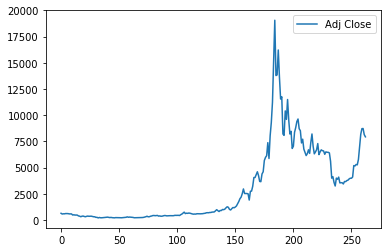

In [214]:
trade_df.plot()

In [215]:
from datetime import datetime
trade_df['Week']=  pd.to_datetime(trade_df['Week']).dt.strftime('%Y-%m-%d')

In [216]:
trade_df.set_index('Week', inplace=True  )
#trade_df['Week'] = pd.DatetimeIndex(start ='2014-06-01', end='2019-06-04', freq ='w') 


KeyError: '2018-01-01'

In [165]:
trade=trade_df # ['Adj Close']


# above is a series of data ..
# trade.reset_index()

In [166]:
trade.head()

,Adj Close
Week,
2014-06-01,651.049988
2014-06-08,582.289978
2014-06-15,603.619995
2014-06-22,601.059998
2014-06-29,626.650024


In [167]:
trade.tail()

,Adj Close
Week,
2019-05-12,8193.139648
2019-05-19,8726.230469
2019-05-26,8737.910156
2019-06-02,8152.810059
2019-06-04,7944.850098


In [168]:
type(trade_df)

pandas.core.frame.DataFrame

# model ARIMA(p,d,q)

# decomposing time series data 
1. seasonality
2. peak in some time of year
3. repetative beahiviur
4. residual: nosie
    

In [173]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition=seasonal_decompose(trade, model='additive', freq=52 )

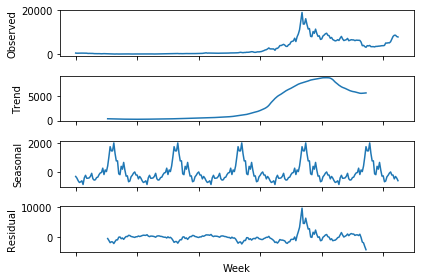

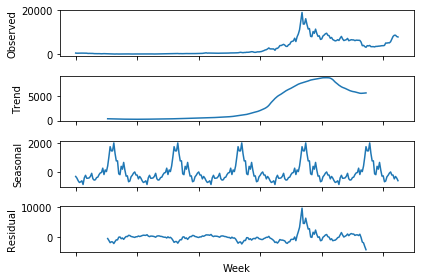

In [174]:
decomposition.plot()

In [175]:
trend= decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

    

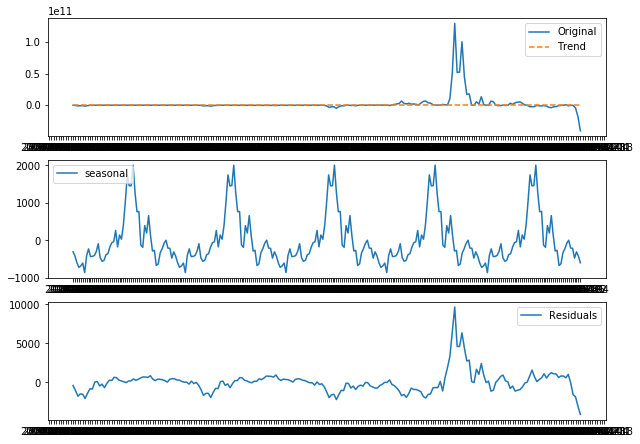

In [176]:
plt.figure(figsize=(10,10))
plt.figure(1)
plt.subplot(411)
plt.plot(trend*seasonal*residual, label='Original')
plt.plot(trend,label='Trend',linestyle='--')
plt.legend(loc='best')


plt.subplot(412)

plt.plot(seasonal,label='seasonal' )
plt.legend(loc='best')

plt.subplot(413)

plt.plot(residual,label='Residuals')
plt.legend(loc='best')




# (Partial) Autocorrelation Function

In [177]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

(0, 50)

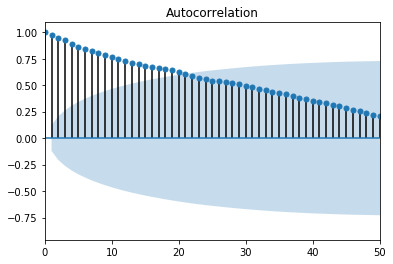

In [178]:
plot_acf(trade)
plt.xlim(0,50)

In [179]:
diff = trade.diff(1).dropna()

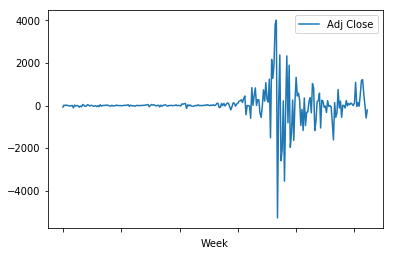

In [180]:
diff.plot()

In [181]:

decomposition=seasonal_decompose(diff, model='additive', freq=52)



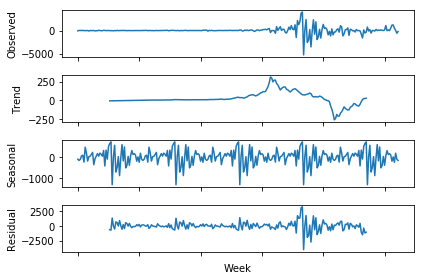

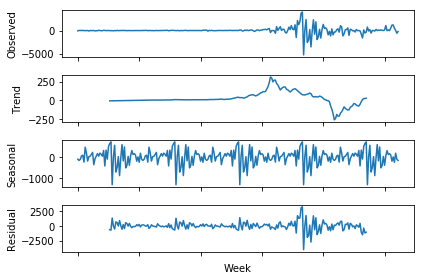

In [182]:
decomposition.plot()

# d = 1

(0, 20)

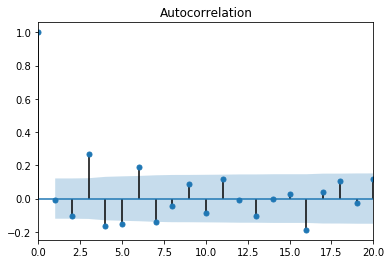

In [183]:
plot_acf(diff)
plt.xlim(0,20)

In [184]:
# for q :  pick a number where in disapper in blue area.. here it is first record.. so will pick the value of 2

###### q=5

# looking for p variable

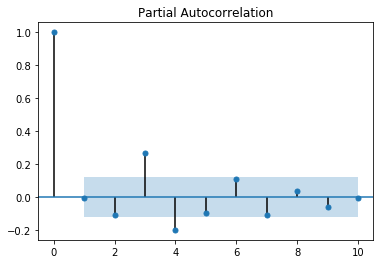

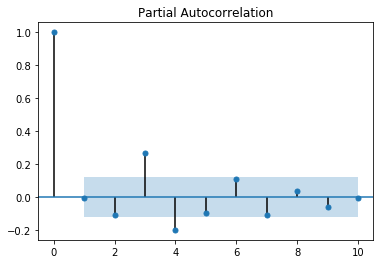

In [185]:
plot_pacf(diff, lags=10)

## for p pick a number where it disappear in blue area.. here it is first record.. so will pick the value of 2
# p=2

In [186]:
# p=2,  d=1, q=5,

# Building ARIMA model

In [187]:
# for splitting data we need to split by time rather than randomly picking a data set for test and train~

In [188]:
#train = trade[:'01-06-2018']
#test = trade['01-07-2018':]
train = trade[:-200]
test = trade[-200:]

In [189]:
train.head()

,Adj Close
Week,
2014-06-01,651.049988
2014-06-08,582.289978
2014-06-15,603.619995
2014-06-22,601.059998
2014-06-29,626.650024


In [190]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model= SARIMAX(train, order=(2,1,1), seasonal_order=(0,0,0,0), enforce_stationarity=False, enforce_invertibility=False)

C:\Users\agarwasg\AppData\Local\Continuum\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [191]:
results = model.fit()

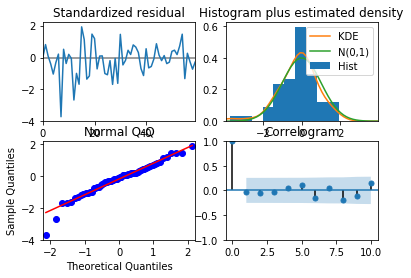

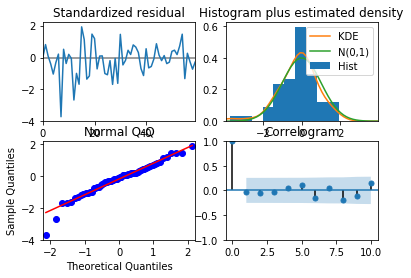

In [192]:
results.plot_diagnostics()

In [193]:
pred = results.predict(start=200,end=250)

C:\Users\agarwasg\AppData\Local\Continuum\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [194]:
pred.head()

200    249.071455
201    249.071455
202    249.071455
203    249.071455
204    249.071455
dtype: float64

In [195]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                   63
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -285.177
Date:                Fri, 12 Jul 2019   AIC                            578.354
Time:                        12:11:18   BIC                            586.731
Sample:                             0   HQIC                           581.631
                                 - 63                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4101      0.562      0.730      0.466      -0.692       1.512
ar.L2          0.1880      0.147      1.278      0.201      -0.100       0.476
ma.L1         -0.5100      0.578     -0.882      0.378      -1.643       0.623
sigma2       783.2061    105.907      7.395      0.000     575.633     990.779
===================================================================================
Ljung-Box (Q):                       36.18   Jarque-Bera (JB):                13.52
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):               0.20   Skew:                            -0.77
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [196]:
# comparing to training set

C:\Users\agarwasg\AppData\Local\Continuum\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


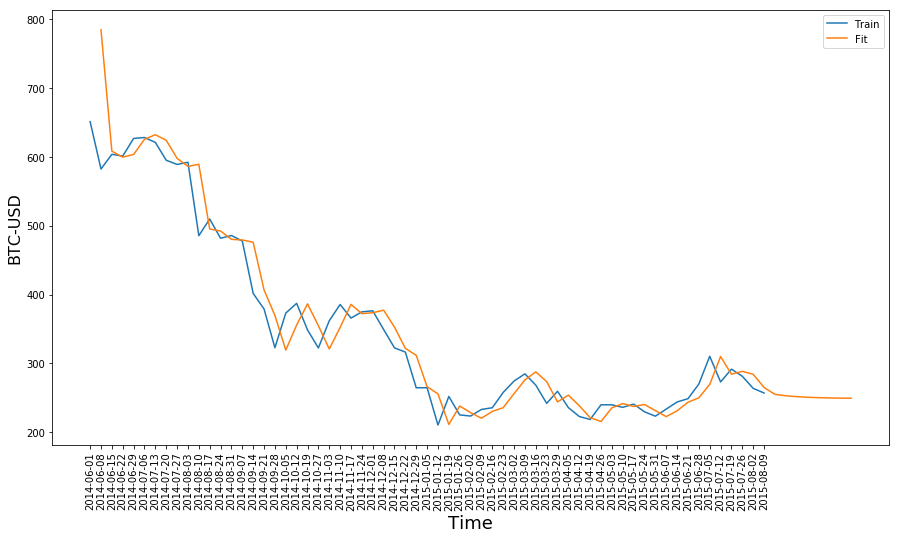

In [197]:
fit= results.predict(start=1,end=70)

plt.figure(figsize=(15,8))
plt.plot(train, label='Train')
plt.plot(fit, label='Fit')
#plt.plot(train, label='Train')
plt.legend(loc='best')
plt.xlabel('Time', fontsize=18)
plt.ylabel('BTC-USD', fontsize=16)
plt.xticks( rotation='vertical') 
plt.show()

In [198]:
fit.head()

1    784.554344
2    608.189404
3    599.543078
4    603.401418
5    625.390138
dtype: float64